In [ ]:
# Creamos carpeta
!mkdir input/
# Descargar archivo listings_details.csv
!wget http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/data/listings.csv.gz -P input/ \
    && gunzip input/listings.csv \
    && mv input/listings.csv input/listings_details.csv
# Descargar archivo reviews_details.csv
!wget http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/data/reviews.csv.gz -P input/ \
    && gunzip input/reviews.csv \
    && mv input/reviews.csv input/reviews_details.csv
# Descargar archivo calendar.csv
!wget http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/data/calendar.csv.gz -P input/ \
    && gunzip input/calendar.csv
# Descargar archivo listing.csv

!wget http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/visualisations/listings.csv -P input/listing.csv

# Descargar archivo neighbourhoods.csv
!wget http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/visualisations/neighbourhoods.csv-P input/listing.csv

# Descargar archivo neighbourhoods.geojson
!wget http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/visualisations/neighbourhoods.geojson -P input/neighbourhoods.geojson

mkdir: cannot create directory ‘input/’: File exists
--2022-06-28 16:06:07--  http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 54.231.201.77
Connecting to data.insideairbnb.com (data.insideairbnb.com)|54.231.201.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6824210 (6.5M) [application/x-gzip]
Saving to: ‘input/listings.csv.gz’

listings.csv.gz     100%[===================>]   6.51M  12.9MB/s    in 0.5s    

2022-06-28 16:06:08 (12.9 MB/s) - ‘input/listings.csv.gz’ saved [6824210/6824210]

--2022-06-28 16:06:08--  http://data.insideairbnb.com/austria/vienna/vienna/2022-06-07/data/reviews.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 54.231.201.77
Connecting to data.insideairbnb.com (data.insideairbnb.com)|54.231.201.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46912420 (45M) [application/x-gzip]
Saving to: ‘input/re

In [ ]:
!pip install geopandas
!pip install chart_studio
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 55.8 MB/s 
     |████████████████████████████████| 16.7 MB 459 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d0ebd74565a6b3ab3d410cafc9431613d7ce49f6398425519c49b49da1932841
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os


# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [ ]:
print(os.listdir("input"))

['neighbourhoods.geojson', 'calendar.csv.gz', 'reviews_details.csv', 'listings.csv', '.ipynb_checkpoints', 'calendar.csv', 'listings_details.csv']


In [ ]:
listings = pd.read_csv("input/listings.csv", index_col= "id")
listings_details = pd.read_csv("input/listings_details.csv", index_col= "id", low_memory=False)

calendar = pd.read_csv("input/calendar.csv", parse_dates=['date'], index_col=['listing_id'])
reviews_details = pd.read_csv("input/reviews_details.csv", parse_dates=['date'])

In [ ]:
print(listings_details.shape)

(11274, 73)


In [ ]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [ ]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate" ]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11274 entries, 561418072780605554 to 641571037971221575
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11262 non-null  object 
 1   host_id                         11274 non-null  int64  
 2   host_name                       11271 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   11274 non-null  object 
 5   latitude                        11274 non-null  float64
 6   longitude                       11274 non-null  float64
 7   room_type                       11274 non-null  object 
 8   price                           11274 non-null  int64  
 9   minimum_nights                  11274 non-null  int64  
 10  number_of_reviews               11274 non-null  int64  
 11  last_review                     9245 non-null   object 
 12  re

In [ ]:
listings = listings.drop(columns=['neighbourhood_group'])
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate
id,,,,,,,,,,,,,,,,,,,,,
561418072780605554,Double im Suburb Hostel,4109732,Thomas,Penzing,48.21533,16.17153,Private room,20,1,9,...,4.89,4.89,5.00,4.67,365,https://www.airbnb.com/rooms/561418072780605554,f,"Hello,\r\n\r\nI am the manager of Suburb Hoste...",within an hour,100.0
39864901,Cozy home as close to nature as to Vienna 1,37411375,Michael,Liesing,48.12474,16.27311,Private room,27,2,20,...,5.00,4.95,5.00,4.95,1125,https://www.airbnb.com/rooms/39864901,t,NaN,within an hour,100.0
349560,Citycenter+Terrace + free garage,1771038,Agnes,Landstra§e,48.20916,16.39557,Entire home/apt,95,7,32,...,4.77,4.73,4.87,4.74,1125,https://www.airbnb.com/rooms/349560,f,"I am 46 years old, i love to travel and meet ...",within an hour,100.0
349676,Close to metro U4,1771038,Agnes,Margareten,48.18825,16.34780,Entire home/apt,89,31,41,...,4.71,4.76,4.78,4.73,1125,https://www.airbnb.com/rooms/349676,f,"I am 46 years old, i love to travel and meet ...",within an hour,100.0
15883,b&b near Old Danube river,62142,Eva,Donaustadt,48.24262,16.42767,Hotel room,110,1,14,...,4.86,4.86,4.93,4.71,365,https://www.airbnb.com/rooms/15883,f,Mein größtes Hobby: Reisen! Am liebsten mit me...,within an hour,100.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 154 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 138 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 159 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 154 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 138 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 159 missing from current font.



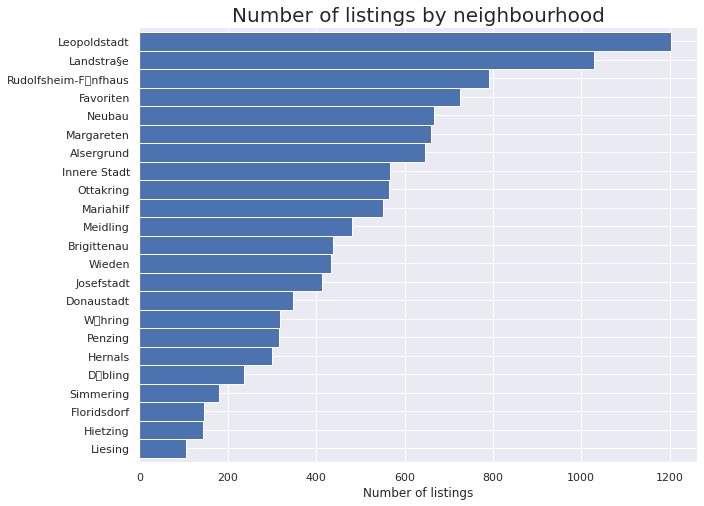

In [ ]:
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [ ]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[48.19483037607005, 16.340921157996107], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

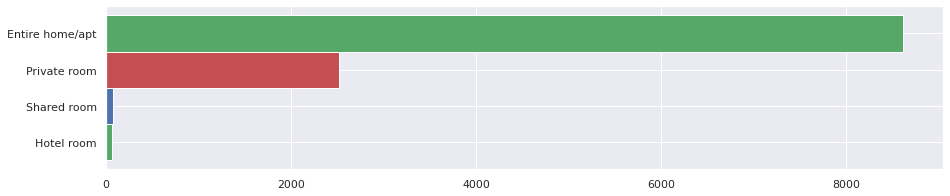

In [ ]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

In [ ]:
listings.property_type.unique()

array(['Private room in bed and breakfast', 'Private room in home',
       'Entire rental unit', 'Room in bed and breakfast',
       'Private room in rental unit', 'Entire townhouse',
       'Private room in condo', 'Entire guesthouse', 'Entire condo',
       'Entire guest suite', 'Entire home', 'Entire villa',
       'Private room in treehouse', 'Entire serviced apartment',
       'Entire loft', 'Entire place', 'Shared room in rental unit',
       'Entire vacation home', 'Private room in townhouse',
       'Shared room in home', 'Private room in loft', 'Entire cottage',
       'Private room', 'Private room in cave', 'Room in hotel',
       'Private room in villa', 'Camper/RV', 'Room in boutique hotel',
       'Room in aparthotel', 'Private room in guest suite',
       'Room in serviced apartment', 'Private room in guesthouse',
       'Entire hostel', 'Private room in serviced apartment',
       'Entire chalet', 'Tiny home', 'Shared room in condo',
       'Entire bungalow', 'Private ro

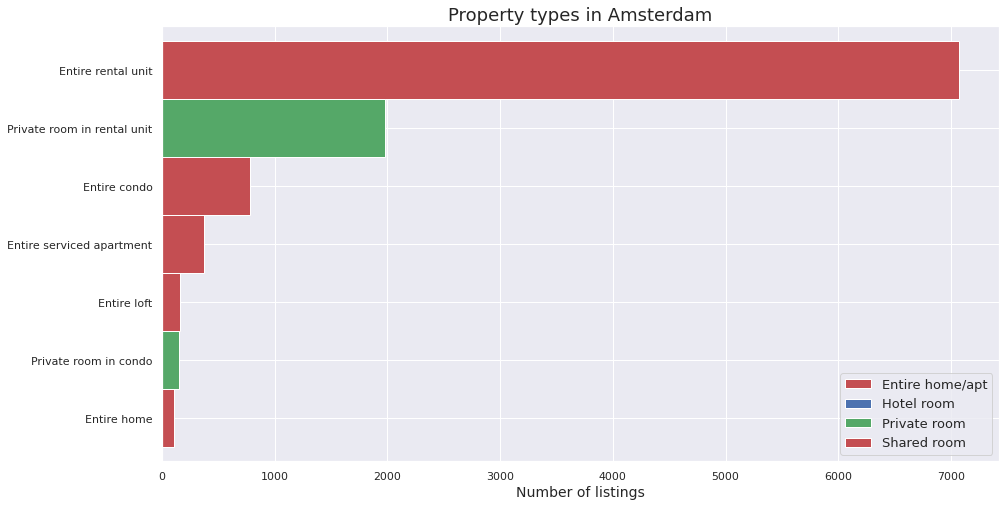

In [ ]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

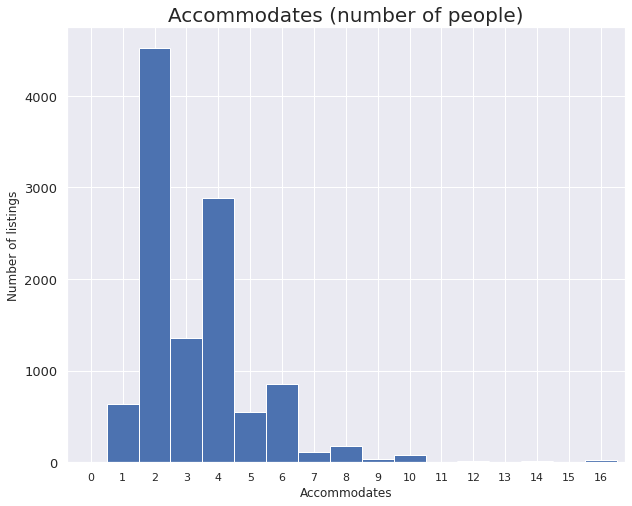

In [ ]:
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 138 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 159 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 154 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 138 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 159 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 154 missing from current font.



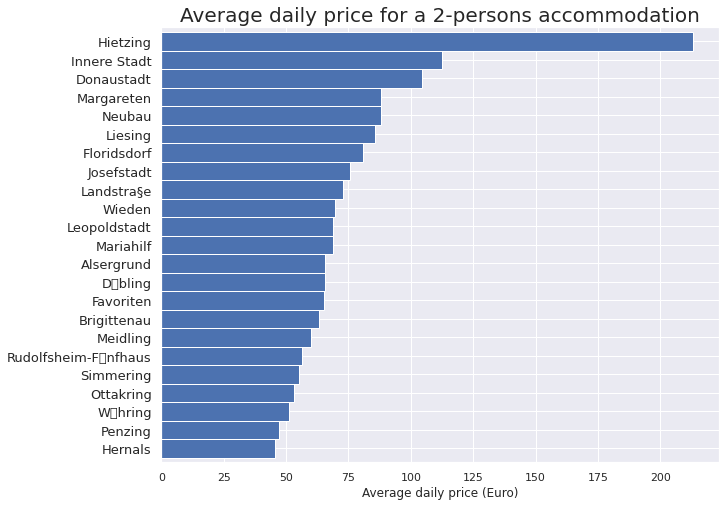

In [ ]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

In [ ]:
adam = gpd.read_file("/content/input/neighbourhoods.geojson/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

In [ ]:
map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['green','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[48.19254173645408, 16.343667739891117], zoom_start=11)
folium.GeoJson(data=adam,
               name='Vienna',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=False,
                                                      sticky=True),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'yellow',
                   'weight': 1,
                   'dashArray': '10, 5',
                   'fillOpacity':0.7
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3